# Bookcrossing   

Note: this is *not* taken from the Google Drive file (as of writing this, it's the current download option for BC) which is about 30% of the original dataset, but rather the *full* dataset. Take this into account if you want to replicate these results. The full dataset can be downloaded from [here](http://www2.informatik.uni-freiburg.de/~cziegler/BX/).

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math
%matplotlib inline

data = pd.read_csv("../../data/bookcrossings/BX-Book-Ratings.csv",
                   delimiter=";",
                   encoding="ISO-8859-1")
data.columns=["user","book","rating"]
data.rating = data.rating.convert_objects(convert_numeric=True)
data.head()

/Users/Matias/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,user,book,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


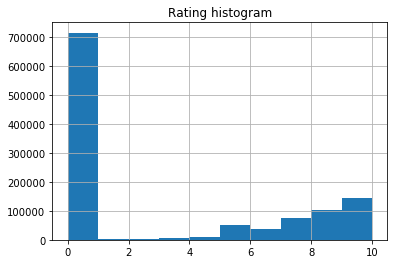

In [2]:
data["rating"].hist(bins=10).set_title("Rating histogram")

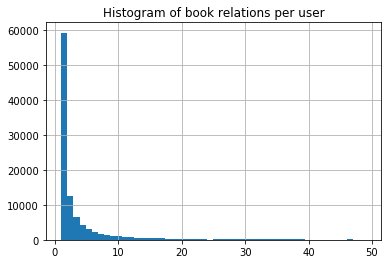

In [3]:
aux = data
aux["count"] = 1
books_per_user = aux.groupby("user").sum()["count"]
plot = books_per_user[books_per_user<50].hist(bins=50)
plot.set_title("Histogram of book relations per user")

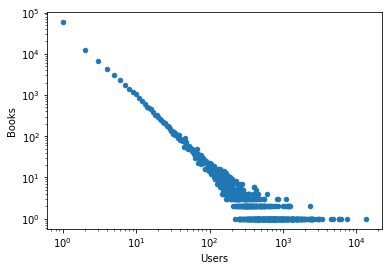

In [4]:
def to_loglog (series,x_label,y_label):
    aux_df = series.to_frame()
    aux_df.columns = ['count1']
    aux_df["count2"] = 1
    df = aux_df.groupby("count1").sum()["count2"].to_frame()
    df.reset_index(inplace=True)
    df.columns = [x_label,y_label]
    df.plot(kind='scatter',x=x_label,y=y_label,loglog=True)
    
to_loglog(books_per_user,x_label='Users',y_label='Books')

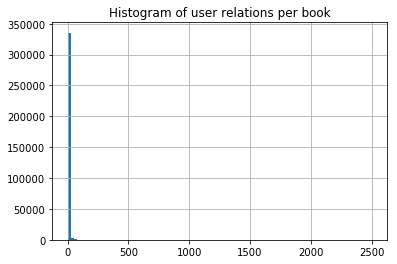

In [5]:
users_per_book = data.groupby("book").count()["count"]
plot = users_per_book.hist(bins=100)
plot.set_title("Histogram of user relations per book")

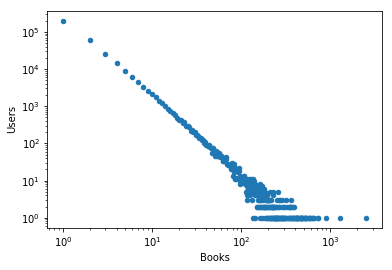

In [6]:
to_loglog(users_per_book,x_label='Books',y_label='Users')

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [41]:
n_users = data["user"].unique().shape[0]
n_books = data["book"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_books)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.00003207
